# Similarity

## Imports

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import itertools
from pathlib import Path
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from kinsim_structure.encoding import Fingerprint
from kinsim_structure.similarity import calculate_similarity

## IO paths

In [4]:
PATH_TO_DATA = Path('/') / 'home' / 'dominique' / 'Documents' / 'data' / 'kinsim' / '20190724_full'
PATH_TO_KINSIM = Path('/') / 'home' / 'dominique' / 'Documents' / 'projects' / 'kinsim_structure'

metadata_path = PATH_TO_KINSIM / 'data' / 'postprocessed' / 'klifs_metadata_postprocessed.csv'
path_to_fingerprints = PATH_TO_KINSIM / 'results' / 'fingerprints'
path_to_similarities = PATH_TO_KINSIM / 'results' / 'similarity'

## Load metadata

In [5]:
klifs_metadata = pd.read_csv(metadata_path, index_col=0)

In [6]:
klifs_metadata.head()

,metadata_index,kinase,family,groups,pdb_id,chain,alternate_model,species,ligand_orthosteric_name,ligand_orthosteric_pdb_id,...,ac_helix,rmsd1,rmsd2,qualityscore,pocket,resolution,missing_residues,missing_atoms,full_ifp,code
0,2886,AAK1,NAK,Other,4wsq,B,A,Human,K-252A,KSA,...,in,0.777,2.125,8.6,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...,1.95,0,14,0000000000000010000001000000000000000000000000...,HUMAN/AAK1/4wsq_chainB_altA
1,10043,AAK1,NAK,Other,5l4q,A,A,Human,"~{N}-[5-(4-cyanophenyl)-1~{H}-pyrrolo[2,3-b]py...",LKB,...,in,0.780,2.137,9.7,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...,1.97,0,3,0000000000000010000000000000000000000000000000...,HUMAN/AAK1/5l4q_chainA_altA
2,7046,AAK1,NAK,Other,5te0,A,-,Human,methyl (3Z)-3-{[(4-{methyl[(4-methylpiperazin-...,XIN,...,in,0.776,2.120,8.8,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...,1.90,0,12,1000101000000010000001000000000000000000000000...,HUMAN/AAK1/5te0_chainA
3,843,ABL1,Abl,TK,2f4j,A,-,Human,CYCLOPROPANECARBOXYLIC ACID {4-[4-(4-METHYL-PI...,VX6,...,in,0.779,2.128,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,1.91,0,0,0000000000000010000001000000000000000000000000...,HUMAN/ABL1/2f4j_chainA
4,815,ABL1,Abl,TK,2g1t,A,-,Human,-,-,...,out,0.825,2.154,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,1.80,0,0,NaN,HUMAN/ABL1/2g1t_chainA


## Load fingerprints

In [7]:
with open(path_to_fingerprints / 'fingerprints.p', 'rb') as f:
    fingerprints = pickle.load(f)
    
print(f'Number of fingerprints: {len(fingerprints)}')
fingerprints = [i for i in fingerprints if i is not None]
print(f'Number of non-empty fingerprints: {len(fingerprints)}')

Number of fingerprints: 3878
Number of non-empty fingerprints: 3875


## Fingerprint type 1

In [8]:
distances_names = 'distance_to_centroid distance_to_hinge_region distance_to_dfg_region distance_to_front_pocket'.split()

distances_df = pd.concat([i.fingerprint_type1[distances_names] for i in fingerprints], axis=0)

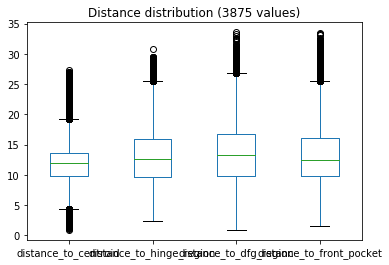

In [9]:
boxplot = distances_df.plot(
    kind='box',
    title=f'Distance distribution ({int(len(distances_df) / 85)} values)'
)

## Fingerprint type 2

In [10]:
moments_df = pd.concat([i.fingerprint_type2['moments'] for i in fingerprints], axis=0)

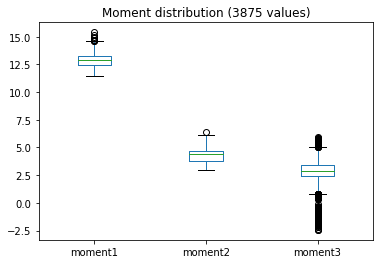

In [11]:
box_plot = moments_df[
    'moment1 moment2 moment3'.split()
].plot(
    kind='box',
    title=f'Moment distribution ({int(len(moments_df) / 4)} values)'
)

In [12]:
moments_df.describe()

,moment1,moment2,moment3
count,15355.000000,15355.000000,15355.000000
mean,12.863334,4.288753,2.830404
std,0.619335,0.551462,1.009179
min,11.466393,2.934483,-2.447183
25%,12.420592,3.756102,2.391310
50%,12.916588,4.441282,2.907908
75%,13.302959,4.704919,3.442314
max,15.410127,6.436920,5.909972


## Fingerprints type 1 - normalization

In [13]:
fingerprints[0].fingerprint_type1_normalized

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure,distance_to_centroid,distance_to_hinge_region,distance_to_dfg_region,distance_to_front_pocket
1,0.5,0.000000,1.0,0.0,1.0,1.0,0.523111,0.296296,0.491143,0.365714,0.545143,0.403714
2,0.0,0.000000,0.0,0.5,0.0,0.0,0.118278,0.344828,0.431143,0.332571,0.470857,0.334000
3,0.5,0.000000,0.0,0.5,0.0,0.0,0.155444,0.750000,0.354571,0.264000,0.432286,0.235429
4,0.0,0.000000,0.0,0.5,0.0,0.0,0.125056,0.451613,0.337143,0.295429,0.390571,0.206286
5,0.5,0.000000,1.0,0.0,1.0,1.0,0.143722,0.142857,0.365714,0.354571,0.365429,0.264000
6,0.0,0.000000,0.0,0.5,0.0,0.0,NaN,0.434783,0.330286,0.367143,0.321429,0.241714
7,0.0,0.000000,0.0,0.5,0.0,0.0,NaN,0.692308,0.333429,0.405714,0.273429,0.296571
8,1.0,0.000000,0.0,0.5,0.0,0.0,0.496000,0.500000,0.387143,0.437714,0.282571,0.369143
9,0.0,0.000000,0.0,0.5,0.0,0.0,0.128056,0.740741,0.316857,0.341714,0.229143,0.306857
10,0.5,0.000000,0.0,0.5,0.0,0.0,0.092111,0.419355,0.325714,0.300857,0.290571,0.282000


## Fingerprints type 2 - normalization

In [14]:
fingerprints[0].fingerprint_type2_normalized['physchem']

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
1,0.5,0.000000,1.0,0.0,1.0,1.0,0.523111,0.296296
2,0.0,0.000000,0.0,0.5,0.0,0.0,0.118278,0.344828
3,0.5,0.000000,0.0,0.5,0.0,0.0,0.155444,0.750000
4,0.0,0.000000,0.0,0.5,0.0,0.0,0.125056,0.451613
5,0.5,0.000000,1.0,0.0,1.0,1.0,0.143722,0.142857
6,0.0,0.000000,0.0,0.5,0.0,0.0,NaN,0.434783
7,0.0,0.000000,0.0,0.5,0.0,0.0,NaN,0.692308
8,1.0,0.000000,0.0,0.5,0.0,0.0,0.496000,0.500000
9,0.0,0.000000,0.0,0.5,0.0,0.0,0.128056,0.740741
10,0.5,0.000000,0.0,0.5,0.0,0.0,0.092111,0.419355


In [15]:
fingerprints[0].fingerprint_type2_normalized['moments']

,moment1,moment2,moment3
distance_to_centroid,12.143529,3.749752,2.960208
distance_to_hinge_region,12.979529,4.897756,3.914870
distance_to_dfg_region,13.644000,4.987616,3.992084
distance_to_front_pocket,13.268588,4.698410,4.086587


## All-against-all comparison

In [16]:
path_to_similarities = PATH_TO_KINSIM / 'results' / 'similarity'
(path_to_similarities / 'scores_allxall_fingerprint_type1.csv').exists()

True

### Fingerprint type 1

In [17]:
aaa_type1 = pd.read_csv(path_to_similarities / 'scores_allxall_fingerprint_type1.csv', index_col=0)

/home/dominique/anaconda3/envs/kinsim/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [18]:
aaa_type1.shape

(7505875, 8)

In [19]:
# Any NaN scores?
aaa_type1[np.isnan(aaa_type1.score)]

,molecule1,molecule2,score,score_physchem,score_spatial,coverage,coverage_physchem,coverage_spatial


### Fingerprint type 2

In [20]:
aaa_type2 = pd.read_csv(path_to_similarities / 'scores_allxall_fingerprint_type2.csv', index_col=0)

In [21]:
aaa_type2.shape

(7505875, 8)

In [22]:
# Any NaN scores?
aaa_type2[np.isnan(aaa_type2.score)]

,molecule1,molecule2,score,score_physchem,score_spatial,coverage,coverage_physchem,coverage_spatial


### Add kinase name

In [23]:
aaa_type1['kinase1'] = aaa_type1['molecule1'].apply(lambda x: x[6:].split('_')[0])
aaa_type1['kinase2'] = aaa_type1['molecule2'].apply(lambda x: x[6:].split('_')[0])

aaa_type2['kinase1'] = aaa_type2['molecule1'].apply(lambda x: x[6:].split('_')[0])
aaa_type2['kinase2'] = aaa_type2['molecule2'].apply(lambda x: x[6:].split('_')[0])

In [24]:
aaa_type1.head()

,molecule1,molecule2,score,score_physchem,score_spatial,coverage,coverage_physchem,coverage_spatial,kinase1,kinase2
0,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/AAK1_5l4q_altA_chainA,0.981337,0.973312,0.989362,NaN,0.991176,1.000000,AAK1,AAK1
1,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/AAK1_5te0_chainA,0.979958,0.972574,0.987343,NaN,0.991176,1.000000,AAK1,AAK1
2,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/ABL1_2f4j_chainA,0.912680,0.849466,0.975893,NaN,0.985294,1.000000,AAK1,ABL1
3,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/ABL1_2g1t_chainA,0.908688,0.846886,0.970490,NaN,0.985294,1.000000,AAK1,ABL1
4,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/ABL1_2g2i_chainA,0.912977,0.849495,0.976460,NaN,0.952941,0.964706,AAK1,ABL1


In [25]:
aaa_type2.head()

,molecule1,molecule2,score,score_physchem,score_spatial,coverage,coverage_physchem,coverage_spatial,kinase1,kinase2
0,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/AAK1_5l4q_altA_chainA,0.940327,0.973312,0.907342,NaN,0.991176,1.0,AAK1,AAK1
1,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/AAK1_5te0_chainA,0.926509,0.972574,0.880445,NaN,0.991176,1.0,AAK1,AAK1
2,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/ABL1_2f4j_chainA,0.783110,0.849466,0.716753,NaN,0.985294,1.0,AAK1,ABL1
3,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/ABL1_2g1t_chainA,0.781358,0.846886,0.715830,NaN,0.985294,1.0,AAK1,ABL1
4,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/ABL1_2g2i_chainA,0.764343,0.849495,0.679191,NaN,0.952941,1.0,AAK1,ABL1


## Score distribution

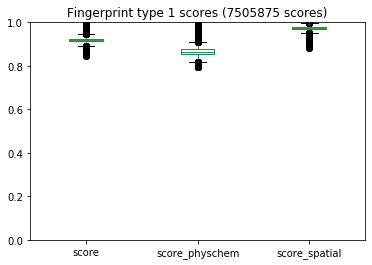

In [33]:
boxplot_aaa_type1 = aaa_type1[
    'score score_physchem score_spatial'.split()
].plot.box(
    ylim=(0, 1),
    title=f'Fingerprint type 1 scores ({len(aaa_type1)} scores)'
)

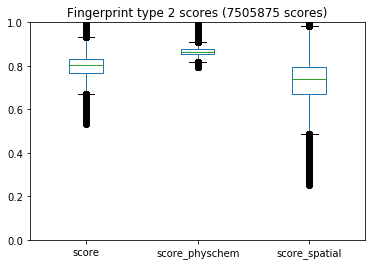

In [34]:
boxplot_aaa_type2 = aaa_type2[
    'score score_physchem score_spatial'.split()
].plot.box(
    ylim=(0, 1),
    title=f'Fingerprint type 2 scores ({len(aaa_type1)} scores)'
)

In [43]:
tmp = aaa_type2[
    'score_physchem score_spatial'.split()
]

In [36]:
boxplot_aaa_type1.get_figure().savefig(path_to_similarities / 'similarity_scores_fp_type1.png', dpi=300)

In [37]:
boxplot_aaa_type2.get_figure().savefig(path_to_similarities / 'similarity_scores_fp_type2.png', dpi=300)

## Best score per kinase pair

### Fingerprint type 1

In [ ]:
aaa_type1_max = aaa_type1.groupby(by=['kinase1', 'kinase2'])['score'].max()

aaa_type1_max.plot(
    kind='box',
    title=f'Number of pairs: {len(aaa_type1_max)}',
    ylim=(0, 1)
)

### Fingerprint type 2

In [ ]:
aaa_type2_max = aaa_type2.groupby(by=['kinase1', 'kinase2'])['score'].max()

aaa_type2_max.plot(
    kind='box',
    title=f'Number of pairs: {len(aaa_type2_max)}',
    ylim=(0, 1)
)

In [ ]:
aaa_type2_count = aaa_type2.groupby(by=['kinase1', 'kinase2'])['score'].count()

In [ ]:
aaa_type2_count.sort_values(ascending=False)

In [ ]:
aaa_type2_count.plot(
    kind='box'
)

## Get similarity matrix with best scoring kinase-pairs

In [ ]:
def get_similarity_matrix(aaa):
    
    best_kinase_pairs = aaa[['kinase1', 'kinase2', 'score']].groupby(by=['kinase1', 'kinase2']).max()
    
    best_kinase_pairs = best_kinase_pairs.unstack(level=1)
    best_kinase_pairs.columns = best_kinase_pairs.columns.droplevel()
    
    # Fill lower matrix
    for index1, row in best_kinase_pairs.iterrows():
        for index2, element in row.items():
            if np.isnan(element):
                best_kinase_pairs.loc[index1, index2] = best_kinase_pairs.loc[index2, index1]
    
    print(best_kinase_pairs.shape)
    
    return best_kinase_pairs

### Fingerprint type 1

In [ ]:
aaa_type1_matrix = get_similarity_matrix(aaa_type1)

In [ ]:
aaa_type1_matrix

In [ ]:
aaa_type1_matrix.to_csv(
    path_to_similarities / 'best_scores_per_kinase_fingerprint_type1.csv'
)

### Fingerprint type 2

In [ ]:
aaa_type2_matrix = get_similarity_matrix(aaa_type2)

In [ ]:
aaa_type2_matrix

In [ ]:
aaa_type2_matrix.to_csv(
    path_to_similarities / 'best_scores_per_kinase_fingerprint_type2.csv'
)

## Kinase family and groups

In [ ]:
klifs_metadata[['kinase', 'groups']].groupby(by='kinase').first()

In [ ]:
klifs_metadata[['kinase', 'groups']].groupby(by='groups').apply(np.unique)